# Load Dataset

In [7]:
# load dataset
import pandas as pd
breaches = pd.read_csv('preprocessed_df.csv')

In [8]:
breaches.shape

(512, 33)

In [9]:
breaches.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,...,weekofyear,Desktop Computer,Electronic Medical Record,Email,Laptop,Network Server,Other Portable Electronic Device,Paper/Films,Yes,No
0,Providence Health Plan,OR,Health Plan,651.0,2019-03-19,Theft,Laptop,Yes,An unencrypted laptop computer containing the ...,0.0,...,12.0,0,0,0,1,0,0,0,1,0
1,"Lanier Family & Cosmetic Dentistry, P.C.",GA,Healthcare Provider,1950.0,2019-01-29,Unauthorized Access/Disclosure,Email,No,"On October 24, 2018, via a business associate ...",0.0,...,5.0,0,0,1,0,0,0,0,0,1
2,ABB Inc. Active Employee Group Benefit Plan,NC,Health Plan,6877.0,2019-01-18,Unauthorized Access/Disclosure,Paper/Films,Yes,"The covered entity (CE), ABB Inc. Active Emplo...",0.0,...,3.0,0,0,0,0,0,0,1,1,0
3,Lebanon VA Medical Center,PA,Healthcare Provider,1002.0,2019-01-16,Unauthorized Access/Disclosure,Email,No,An employee of the covered entity (CE) inadver...,0.0,...,3.0,0,0,1,0,0,0,0,0,1
4,Humana Inc,KY,Health Plan,684.0,2018-12-31,Theft,Paper/Films,No,"On July 3, 2018, the covered entity’s (CE) sal...",0.0,...,1.0,0,0,0,0,0,0,1,0,1


In [10]:
# Double check that data is balanced
breaches['Hacking/IT Incident'].value_counts()

1.0    256
0.0    256
Name: Hacking/IT Incident, dtype: int64

# I. Random Forest Classifier Model 

Apply random forest model, to classfication problem of predicting Hacking/IT Incident breach types.

Predictor variables are separated into binary categories.

Data is balanced, selecting 512 observations, in order to accurately predict as we only have 256 values for hacking/it incident breach types, so we select only 256 for other breach types as well.

Select predictor variables: Individuals Affected, Breach Submission Date (separated), unique breach types, unique 
location of breach methods, Business Associate Present.

Select target variable: Hacking/IT Incident breach type, other breach types.

# Feature Selection

In [11]:
# Implement Random Forest Classifier Machine Learning Model
# to predict type of breach

# Split dataset into features and target variable

# Features
X = breaches[['Individuals Affected', 
            'Year', # Date features
            'Month', 
            'Day',
            'quarter',
            'dayofweek',
            'is_weekend',
            'weekofyear',
            'Desktop Computer', # Location of breach methods
            'Electronic Medical Record', 
            'Email', 
            'Laptop',
            'Network Server', 
            'Other Portable Electronic Device', 
            'Paper/Films',
            'Yes', # Business Associate presence
            'No']] 

# Target variable
y = breaches['Hacking/IT Incident'] 

In [12]:
X.shape 

(512, 17)

In [13]:
y.shape 

(512,)

In [14]:
# load libraries
import numpy as np  
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Create a Gaussian Classifier
forest = RandomForestClassifier(n_estimators=100) 

#  Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Train classifer
forest.fit(X_train, y_train) 

# Predict the response for test dataset
y_pred = forest.predict(X_test) 

# Evaluating Model

Check accuracy using actual and predicted values.

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy for train set:", forest.score(X_train, y_train)) 
print("Accuracy test set:",forest.score(X_test, y_test))

Accuracy for train set: 1.0
Accuracy test set: 0.8058252427184466


In [16]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[48 11]
 [ 9 35]]


In [17]:
# Classification Report using Gini Index Decision Tree
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83        59
         1.0       0.76      0.80      0.78        44

    accuracy                           0.81       103
   macro avg       0.80      0.80      0.80       103
weighted avg       0.81      0.81      0.81       103



Model produced a classification rate of 80.5 percent which is considered good accuracy. This accuracy can be improved by tuning the parameters in the Random Forest Algorithm. Note, it seems that there is overfitting on the traning set as indiciated by the accuracy score of 100 percent. 

# Tuning Model: 

# Finding Important Features using Scikit-learn

First, you need to create a random forests model.
Second, use the feature importance variable to see feature importance scores.
Third, visualize these scores using the seaborn library.

In [18]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
import pandas as pd

# Extract feature importances
feature_imp = pd.DataFrame({'feature': list(breaches[['Individuals Affected', 
            'Year', 
            'Month', 
            'Day',
            'quarter',
            'dayofweek',
            'is_weekend',
            'weekofyear',
            'Desktop Computer', 
            'Electronic Medical Record', 
            'Email', 
            'Laptop',
            'Network Server', 
            'Other Portable Electronic Device', 
            'Paper/Films',
            'Yes', 
            'No']] ),
                   'importance': clf_2.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
feature_imp.head()


,feature,importance
1,Year,0.261409
12,Network Server,0.156853
0,Individuals Affected,0.106258
14,Paper/Films,0.101201
7,weekofyear,0.067898


# Visualize

Not sure what is going wrong here...need to fix plots.

No handles with labels found to put in legend.


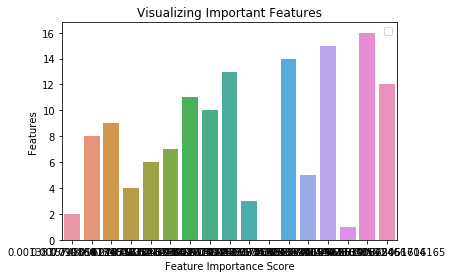

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Creating a bar plot
sns.barplot(x=feature_imp.importance, y=feature_imp.importance.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

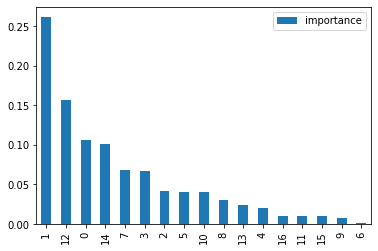

In [57]:
feature_imp.plot(kind='bar') 

# Generate the model on selected features

Here less important features were removed and only  the top five important features are used. 

In [71]:
# Split dataset into features and labels
X_1=breaches[['Year','Network Server', 'Individuals Affected', 'Paper/Films','weekofyear']]  
y_1=breaches['Hacking/IT Incident']                                       
# Split dataset into training set and test set
XImp_train, XImp_test, yImp_train, yImp_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42) 

In [72]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_3=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_3.fit(XImp_train,yImp_train)

# prediction on test set
yImp_pred=clf_3.predict(XImp_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yImp_test, yImp_pred))

Accuracy: 0.8446601941747572


5% increase in accuracy.